In [4]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading dataset
dataset =load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df_usa = df[df['job_country']=='United States'].copy()

In [5]:
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [8]:
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')

In [10]:
df_usa_pivot = df_usa.pivot_table(index='job_posted_month',columns ='job_title_short', aggfunc ='size')

In [31]:
df_usa_pivot.reset_index(drop=True, inplace=True)
df_usa_pivot['month_no'] =pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month

In [32]:
df_usa_pivot.sort_values('month_no',inplace =True)
df_usa_pivot.set_index('job_posted_month',inplace = True)
df_usa_pivot.drop(columns ='month_no',inplace =True)

In [33]:
df_usa_pivot

job_title_short,level_0,index,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,,,
January,4,4,527,36,8494,2655,6915,60,1544,773,1552,114
February,3,3,447,24,6124,3060,4956,56,1258,878,1127,90
March,7,7,438,19,6218,3183,4779,59,1114,829,1150,115
April,0,0,565,40,6049,2801,4867,51,1025,781,991,112
May,8,8,279,20,4993,2976,4377,49,839,746,914,90
June,6,6,446,32,5683,2893,4645,48,1009,812,1033,93
July,5,5,581,39,5201,2570,4876,65,883,747,1095,153
August,1,1,903,39,6634,3269,6318,68,1186,903,1515,194
September,11,11,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

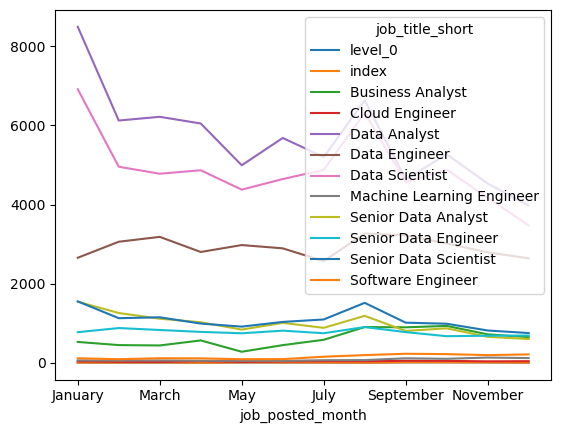

In [34]:
df_usa_pivot.plot(kind ='line')

In [40]:
top_3 = df_usa['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()

<Axes: xlabel='job_posted_month'>

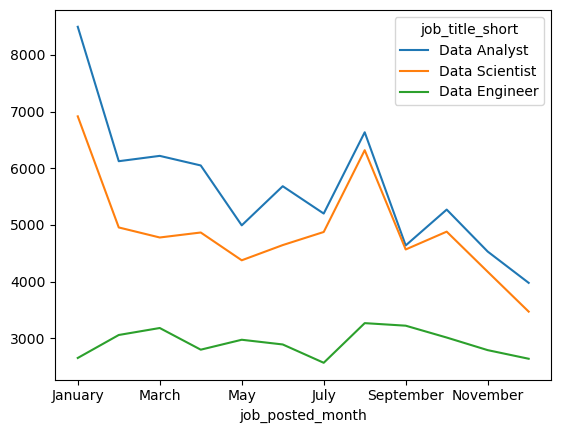

In [41]:
df_usa_pivot[top_3].plot(kind ='line')